---------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------
                       
                               Done By: Ibrahim Nemer (inemer@kfupm.edu.sa)
        
---------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------

In [156]:
###########################################################################################################################
################################################### Group Details #########################################################
###########################################################################################################################
groupNumber = "7"
studentName1 = "Talal Khaled Alharbi"
studentNameID1 = "202036240"
sectionNumber1 = "63"
stdContribution1 = "50%"
###########################################################################################################################
studentName2 = "Mohammed Abdulrahman Aldakhil"
studentNameID2 = "202043820"
sectionNumber2 = "63"
stdContribution2 = "50%"
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################

# Title
## Student Menu Transcript Service.

# Purpose
## To provide a menu with features to get certian data available in the menu.

# Methodology
First, we start gathering all data from a ceritian studant file into a dictionary. Then, the program will filter the dictionary by the chosen degree(s) via startFeature. Then, a menu will be displayed showing 8 diffrent features. For example, if the user chose (majorTranscriptFeature), the already filterd dictionary will be filterd again twice, once for undergraduate courses, and once for graduate courses.

# Improvements
Show how you divided your project into stages and the required time for each stage, as follows:
- Stage ONE: Functions 1,9,10 => getInfo and we achieved it within five hours.
- Stage TWO: Functions 2,3 => startFeature,menuFeature and we achieved it within one full day
- Stage THREE: Function 4 => detailsFeature and we did it four hours
- Stage FOUR: Function 5 => statisticsFeature and we did it in two days
- Stage FIVE: Functions 6,7 => major,minorTranscriptFeature and we did it in one day
- Stage SIX: Function 8 => fullTranscriptFeature and we did it in one hour

# Results
Describe and comment the most important results for each stage as images (insert your image and describe it briefly).

# Remaining stages
We still could not figure a way to implement a counter that does not reset.

# Setup

## Local library import
We import all the required Python libraries in the following cell only.

In [157]:
# libraries and modules based on the permitted list on the description of the project
import time
from IPython.display import clear_output
import os
from datetime import datetime

## Other library import
We import also another libraries which are not from the permitted list. Here, you are required to comment why you add them and if you got approval from your lab instructor or NOT.

In [158]:
# Include other libraries
#None

# Functions
Put your functions including the main function after this line in code-cells, add cells as the number of functions.

In [159]:
#Function-1
# This function starts the program

def main():
    
    # Open counter file
    
    counterFile = open('COUNTER_FILE.txt','w')
    
    studId = input('please enter your id: ').strip() # get user id and pass it to startFeature
    counterFile.close()
    
    startFeature(studId)

In [160]:
#Function-2
#################################################################################################################

#this function is used to store all the data for a chosen student in a dictionary.

#################################################################################################################
def getInfo(studID): # @param is student Id from startFeature() function
    studentFile = open(studID + '.csv','r')
    studentInfo = {} # set dictionary for gathering all data for all degrees
    studentFile.readline().strip().split(','),'\n'
    clear_output()
    for line in studentFile:
        courseInfo = line.strip().split(',')[0:4]+line.strip().split(',')[5:] # Set varible for gathring values for keys
        courseId = line.split(',')[4]
        
        # Replace str numbers to float numbers
        courseInfo[6] = float(courseInfo[6])
        courseInfo[5] = int(courseInfo[5])
        courseInfo[2] = int(courseInfo[2])
        studentInfo[courseId] = courseInfo
    studentFile.close() # close the file after successful file opening operation.
    return(studentInfo) # return Dict With course id as key and all student grades, major, minors, credit Hours etc.

In [161]:
#Function-3
#################################################################################################################


# This function Starts the program & Filters the general dictionary called form getInfo function according to chosen
# degrees & creates the header for previous requests file if it has not been generated yet
#& waits for a few seconds, clears the outbut & directs the user to the menuFeature.


#################################################################################################################
def startFeature(studId): # @param is student Id from main() function
    found = False # initlize to enter while loop
    while not found:
        try:
            studentFile = open(studId +'.csv','r')
            found = True
            studentInfo = getInfo(studId)
            availableDegrees = [] 
           
            studentDegreeInfo = {}
            
            for info in studentInfo:
                if studentInfo[info][1][0] not in availableDegrees: #loop for checking the available degree(s) and appending them to a list
                    availableDegrees.append((studentInfo[info][1][0]))
            
            for Degree in range(len(availableDegrees)): 
                UserDegree = input(f'Please chose a degree from available (Enter[Q] to quit) {availableDegrees}: ').upper()
                while UserDegree not in availableDegrees:
                    if UserDegree == 'Q':
                        if studentDegreeInfo == {}: #if user entered Q from the first time he will be directed to the main() to choose another student.
                            main()
                        break #first break here to go out the while loop
                    UserDegree = input(f'Sorry Chosen degeree is not available\nPlease chose a degree from available (Enter[Q] to quit) {availableDegrees}: ').upper()
                if UserDegree == 'Q':
                    break # second break to go out the for loop
                for courseId in studentInfo:
                    if studentInfo[courseId][1][0]==UserDegree:
                        studentDegreeInfo[courseId] = studentInfo[courseId]
            
            studentFile.close()
            time.sleep(3)
            clear_output()

            previousRequestsFile = open(f'std{studId}PreviousRequests.txt','a')
            fileSize = os.path.getsize(f'std{studId}PreviousRequests.txt')
            if fileSize == 0: #creating the header for the previous request file once if this condition is true
                print('%-20s%-20s%s'%('Request','Date','Time'),file=previousRequestsFile)
                print('='*53,file=previousRequestsFile)
            previousRequestsFile.close()
            menuFeature(studentDegreeInfo,studId)
  
        except FileNotFoundError:
            print('Sorry no ID found, Try again',end=', ')
            studId = input('please enter your id: ').strip()

In [162]:
#Function-4
#################################################################################################################


# This function creates a menu generated by a dictionary & gets the current time and date. Then, the user may choose
# from any 8 diffrent features & calls the chosen feature & and lastly, it closes the previous requests file.


#################################################################################################################
def menuFeature(studFullInfo,studentId): # @param is dictionary
    separator = '='*45                   # @param is student Id from startFeature() function   
    studentMenu = {
        '1' : 'Student details',
        '2' : 'Statistics',
        '3' : 'Transcript based on major courses',
        '4' : 'Transcript based on minor courses',
        '5' : 'Full transcript',
        '6' : 'Previous transcript requests',
        '7' : 'Select another student',
        '8' : 'Terminate the system'
    }
    
    # Open Counter file to append and then read sum of values.
    
    counterFile = open('COUNTER_FILE.txt','a')
    
    currentDate = f'{datetime.now().day}/{datetime.now().month}/{datetime.now().year}'
    if datetime.now().hour >=0 and datetime.now().hour<=11:
        morningT = 'AM'
    else:
        morningT = 'PM'       
    currentTime = f'{datetime.now().hour}:{datetime.now().minute} {morningT}'

    previousRequestsFile = open(f'std{studentId}PreviousRequests.txt','a')
    
    print(f'Student Transcript Generation System\n{separator}')
    
    # create the menu table via for loop
    for key in studentMenu:
        print(f'{key}. {studentMenu[key]}')
    studentChoices = studentMenu.keys() # Get num chices in a list
    print(separator)
    
    studentSelectedFeature = input('\nEnter Your Feature: ')
    # Prevent wrong choises from ocuuring.
    while studentSelectedFeature not in studentChoices:
        studentSelectedFeature = input('Chosen feature does not exist, please choose another: ')
    
    if studentSelectedFeature == '7':
        newStudentFeature()
        
    elif studentSelectedFeature == '8':
        previousRequestsFile.close()
        
        counterFile = open('COUNTER_FILE.txt','r') # Change file mode to read.
        
        print(len(counterFile.read().split(','))-1) # Gaters file data in one lists ans reads its lenght - last comma.
        
        counterFile.close()
        terminateFeature()
    
    elif studentSelectedFeature == '1':
        previousRequestsFile.write('%-20s%-20s%s\n'%('StudentDetails',currentDate,currentTime))
        counterFile.write('1,')
        previousRequestsFile.close()
        counterFile.close()
        detailsFeature(studFullInfo,studentId)
        menuFeature(studFullInfo,studentId)
        
    elif studentSelectedFeature == '2':
        previousRequestsFile.write('%-20s%-20s%s\n'%('Statics',currentDate,currentTime))
        counterFile.write('1,')
        previousRequestsFile.close()
        counterFile.close()
        statisticsFeature(studFullInfo,studentId)
        menuFeature(studFullInfo,studentId)
    
    elif studentSelectedFeature == '3': 
        previousRequestsFile.write('%-20s%-20s%s\n'%('Major',currentDate,currentTime))
        counterFile.write('1,')
        previousRequestsFile.close()
        counterFile.close()
        majorTranscriptFeature(studFullInfo,studentId)    
        menuFeature(studFullInfo,studentId)
        
    elif studentSelectedFeature == '4':
        previousRequestsFile.write('%-20s%-20s%s\n'%('Minor',currentDate,currentTime))
        counterFile.write('1,')
        previousRequestsFile.close()
        counterFile.close()
        minorTranscriptFeature(studFullInfo,studentId)
        menuFeature(studFullInfo,studentId)
    
    elif studentSelectedFeature == '5':
        previousRequestsFile.write('%-20s%-20s%s\n'%('Full',currentDate,currentTime))
        counterFile.write('1,')
        previousRequestsFile.close()
        counterFile.close()
        fullTranscriptFeature(studFullInfo,studentId)
        menuFeature(studFullInfo,studentId)
    
    elif studentSelectedFeature == '6':
        counterFile.write('1,')
        counterFile.close()
        previousRequestsFile.close()
        with open(f'std{studentId}PreviousRequests.txt','r') as readPreviousRequests:    
            print(readPreviousRequests.read())       
        menuFeature(studFullInfo,studentId)

In [163]:
#Function-5
#################################################################################################################


# This function gets all data needed from studentsDetail.csv file & creates a file with the same output on the screen.


#################################################################################################################
def detailsFeature(studentInfo,studentId): # @param is dictionary
                                           # @param is student Id from menuFeature() function
    studentStoredDetailFile = open(f'std{studentId}details.txt','w')
    
    print('Name:',getName(studentId))
    studentStoredDetailFile.write(f'Name: {getName(studentId)}\n')
    
    print('stdId:',studentId)
    studentStoredDetailFile.write(f'studId: {studentId}\n')
    
    # Defining multiple variables in one line: got from studentDetailsInfo function.
    
    levels,degrees,numberOfTerms,colleges,departments = studentDetailsInfo(studentInfo,studentId)[4],studentDetailsInfo(studentInfo,studentId)[5],studentDetailsInfo(studentInfo,studentId)[-1],studentDetailsInfo(studentInfo,studentId)[3],studentDetailsInfo(studentInfo,studentId)[2]

    print('Level(s):',','.join(levels))
    studentStoredDetailFile.write(f"Level(s): {','.join(levels)}\n")

    print('Number of terms:',','.join(numberOfTerms))
    studentStoredDetailFile.write(f"Number of Terms: {','.join(numberOfTerms)}\n")
    
    print('Colleges:',','.join(colleges))
    studentStoredDetailFile.write(f"Colleges(s): {','.join(colleges)}\n")
    
    print('Departments:',','.join(departments))
    studentStoredDetailFile.write(f"Department(s): {','.join(departments)}\n")
    
    studentStoredDetailFile.close()

In [164]:
#Function-6
#################################################################################################################


# This function filters studFullInfo dictionary according to chosen degrees. If degree was not chosen, then the
# function will not consider printing any other degree, and it will print data according to dictionary provided
# by startFeature.

#################################################################################################################

def statisticsFeature(studFullInfo,studentId):# @param is dictionary
                                              # @param is student Id from startFeature() function
    # defin dictionries to separate degrees.    
    masterDict = {}
    phdDict = {}
    bachlorDict = {}
    
    availableDegrees = [] # set list to loop over degress and delete them after opprations are done.
    stars = '*'*12
    
    # Append degrees in availableDegrees.
    
    for availableDegree in studFullInfo.values():
        if availableDegree[1][0] not in availableDegrees:
            availableDegrees.append(availableDegree[1][0])
            
    for degree in studFullInfo:# filtering the large dictonary (studFullInfo) into small dictonaries 
        if studFullInfo[degree][1][0] == 'M':
            masterDict[degree] = studFullInfo[degree]
        if studFullInfo[degree][1][0] == 'D':
            phdDict[degree] = studFullInfo[degree]
        if studFullInfo[degree][1][0] == 'B':
            bachlorDict[degree] = studFullInfo[degree]
    
    while availableDegrees != []: # BIG WHILE LOOP ==> LOOP OVER DICTIONARY
        
        if 'B' in availableDegrees:
            print('='*53)
            print('%-17sUndergraduate Level%17s'%(stars,stars))
            print('='*53)
            
            with open(f'std{studentId}statistics.txt','w') as statisticsFile:#open the file for statisticsFeature() and 
                print('='*53,file = statisticsFile)         #add what is in the screen to the file for each degree.
                print('%-17sUndergraduate Level%17s'%(stars,stars),file = statisticsFile)
                print('='*53,file = statisticsFile)
            
            statisticsCalc(bachlorDict,'B',studentId)
            availableDegrees.remove('B') #after calling the statisticsCalc()function the program will delete the degree
                                         #for the availableDegrees list.
        if 'M' in availableDegrees:
            print('='*53)
            print('%-18sGraduate(M) Level%18s'%(stars,stars))
            print('='*53)
            
            with open(f'std{studentId}statistics.txt','a') as statisticsFile:    
                print('='*53,file = statisticsFile)
                print('%-18sGraduate(M) Level%18s'%(stars,stars),file = statisticsFile)
                print('='*53,file = statisticsFile)
            
            statisticsCalc(masterDict,'M',studentId)
            availableDegrees.remove('M')
        
        if 'D' in availableDegrees:
            print('='*53)
            print('%-18sGraduate(D) Level%18s'%(stars,stars))
            print('='*53)
            
            with open(f'std{studentId}statistics.txt','a') as statisticsFile:
                print('='*53,file = statisticsFile)
                print('%-18sGraduate(D) Level%18s'%(stars,stars),file = statisticsFile)
                print('='*53,file = statisticsFile)
            
            statisticsCalc(phdDict,'D',studentId)
            availableDegrees.remove('D')
            
    input("click any key to clear the screen")
    clear_output()
    time.sleep(3)

In [165]:
#Function-7
#################################################################################################################


## this function will recive a filtered dictionary, will do various calculations and filtering
#to print it in a formal way and this function is only for calculations and printing it won't return anything.


#################################################################################################################
def statisticsCalc(dictDegree,degree,studentID): # @param is a filtered dictionary
                                                 # @param is the degree for the student
                                                 # @param is student Id from statisticsFeature() function
    totalPoints = []#List used for getting the avarage
    ToatlCredit = []#List used for getting the avarage
    numberOfTerms = []
    maxGrade = 0 #initlize the max grade
    minGrade = 100 #initlize the min grade
    courses = [] #appending courses to check repetition for courses
    repeatedCoureses = [] #list for repedeted courses
    eachTermCounter = 0 
    stars = '*'*12
    
    statisticsFile = open(f'std{studentID}statistics.txt','a') #open the file for statisticsFeature() and add 
                                                           #what is in the screen to the file for each degree.
    
    for course in dictDegree.values():
        courses.append(course[3])
            
    for grade in dictDegree.values(): #loop for calculating the avaerage out of 4
        if grade[-1] >=95:
            point = grade[-2] * 4
            totalPoints.append(point)
            ToatlCredit.append(grade[-2])
            
        elif grade[-1] >=90 and grade[-1]<95:
            point = grade[-2] * 3.75
            totalPoints.append(point)
            ToatlCredit.append(grade[-2])
     
        elif grade[-1] >=85 and grade[-1]<90:
            point = grade[-2] * 3.5
            totalPoints.append(point)
            ToatlCredit.append(grade[-2])

        elif grade[-1] >=80 and grade[-1]<85:
            point = grade[-2] * 3.0
            totalPoints.append(point)
            ToatlCredit.append(grade[-2])
    
        elif grade[-1] >=75 and grade[-1]<80:
            point = grade[-2] * 2.5
            totalPoints.append(point)
            ToatlCredit.append(grade[-2])
 
        elif grade[-1] >=70 and grade[-1]<75:
            point = grade[-2] * 2.0
            totalPoints.append(point)
            ToatlCredit.append(grade[-2])
      
        elif grade[-1] >=65 and grade[-1]<70:
            point = grade[-2] * 1.5
            totalPoints.append(point)
            ToatlCredit.append(grade[-2])          
        
        elif grade[-1] >=60 and grade[-1]<65:
            point = grade[-2] * 1.0
            totalPoints.append(point)
            ToatlCredit.append(grade[-2])      
        
        else:
            totalPoints.append(0)
            ToatlCredit.append(grade[-2])
        
        if grade[2] not in numberOfTerms:
            numberOfTerms.append(grade[2])
    
    print(f'Overall average (major and minor) for all terms: {round(sum(totalPoints)/sum(ToatlCredit),2)}')
    print('Avarage (major and minor) for each term:')
    
    print(f'Overall average (major and minor) for all terms: {round(sum(totalPoints)/sum(ToatlCredit),2)}',file = statisticsFile)
    print('Avarage (major and minor) for each term:',file = statisticsFile)
    
    for term in range(0,len(numberOfTerms)):#loop for calculating the and printing the average for each term
        eachTermAverage = 0
        eachTermCreditHours = 0
        
        for key in dictDegree.values():
            if key[2] == term+1:
                eachTermAverage+=totalPoints[eachTermCounter]
                eachTermCreditHours+=ToatlCredit[eachTermCounter]     
                eachTermCounter+=1
        
        print(f'Term {term+1}: {round(eachTermAverage/eachTermCreditHours,2)}')
        print(f'Term {term+1}: {round(eachTermAverage/eachTermCreditHours,2)}',file = statisticsFile)
                
    for maxNum in dictDegree.values(): #loop for getting the maximum grade
        if maxNum[-1]>maxGrade: 
            maxGrade = maxNum[-1]
            indexMax = maxNum[2]
    
    for minNum in dictDegree.values(): #loop for getting the minimum grade 
        if minNum[-1]<minGrade:
            minGrade = minNum[-1]
            indexMin = minNum[2]
    
    print(f'Maximum grade and in which term: {maxGrade,indexMax}')
    print(f'Minimum grade and in which term: {minGrade,indexMin}')
    
    print(f'Maximum grade and in which term: {maxGrade,indexMax}',file = statisticsFile)
    print(f'Minimum grade and in which term: {minGrade,indexMin}',file = statisticsFile)
            
    for course in courses: # checking for a repeated courses
        if courses.count(course) > 1 and course not in repeatedCoureses:
            repeatedCoureses.append(course)
            
    print('Do you have any repeated course(s)?',end=' ')
    print('Do you have any repeated course(s)?',end=' ',file = statisticsFile)
    
    if repeatedCoureses == []:
        print('NO')
        print('NO',file = statisticsFile)
    else:
        print('\nYes, and that course(s) is/are',','.join(repeatedCoureses))
        print('\nYes, and that course(s) is/are',','.join(repeatedCoureses),file = statisticsFile)
        
    statisticsFile.close()

In [166]:
#Function-8
#################################################################################################################


# This function is to display the transcript for major degrees so it will recive a dictionary and it will filter
# the dictionary into 2 dictionaries to do multiple calculations on it.


#################################################################################################################
def majorTranscriptFeature(studentInfo,studentId):# @param is a dictionary
                       # @param is student Id from startFeature() function
    
    majorFullDict = {} # dictionary for major degree
    uMajorDict = {} # dictionary for undergraduat level major
    gMajorDict = {} # dictionary for graduat level major
    
    for key in studentInfo:# To filter the dictionary into major dictionary 
        if studentInfo[key][4] == 'Major':
            majorFullDict[key] = studentInfo[key]
            
    for levelInfo in majorFullDict:# To filter the major dictionary into undergraduat and graduat level major
        if majorFullDict[levelInfo][0] == 'U':
            uMajorDict[levelInfo] = majorFullDict[levelInfo]
        if majorFullDict[levelInfo][0] == 'G':
            gMajorDict[levelInfo] = majorFullDict[levelInfo]
    # calling studentDetailsInfo() function header for the chosen student.             
    levels,degrees,numberOfTerms,colleges,departments,minors,majors,name = studentDetailsInfo(studentInfo,studentId)[4],studentDetailsInfo(studentInfo,studentId)[5],studentDetailsInfo(studentInfo,studentId)[-1],studentDetailsInfo(studentInfo,studentId)[3],studentDetailsInfo(studentInfo,studentId)[2],studentDetailsInfo(studentInfo,studentId)[0],studentDetailsInfo(studentInfo,studentId)[1],getName(studentId)
    
    print('Name:%-40sstdID:%5s\nCollege:%-40sDepartment:%5s\nMajor:%-40sMinor:%5s\nLevel(s):%-40sNumber of terms:%5s'%(name,studentId,','.join(colleges),','.join(departments),','.join(majors),','.join(minors),','.join(levels),','.join(numberOfTerms)))
    
    with open(f'std{studentId}MajorTranscript.txt','w') as majorFile:
        print('Name:%-40sstdID:%5s\nCollege:%-40sDepartment:%5s\nMajor:%-40sMinor:%5s\nLevel(s):%-40sNumber of terms:%5s'%(name,studentId,','.join(colleges),','.join(departments),','.join(majors),','.join(minors),','.join(levels),','.join(numberOfTerms)),file = majorFile)
    
    if uMajorDict != {}: #passing the filter dictionary to the majorInfo() function to do the printing and calculations.
        majorInfo(uMajorDict,studentId)
        
    if gMajorDict != {}:
        majorInfo(gMajorDict,studentId)
    
    input("click any key to clear the screen")
    clear_output()
    time.sleep(3)

In [167]:
#Function-9
#################################################################################################################


#this function will do some calculation on the filtered dictionary that has been passed to it 
#and will store the output data into a file.


#################################################################################################################
def majorInfo(majorDict,studentId):
    #opening the file for this feature.
    majorFile = open(f'std{studentId}MajorTranscript.txt','a')
    
    stars = '*'*12
    MaxTerm = []
    overAllAverage = []
    allTerms = []

    for key in majorDict:
        if majorDict[key][2] not in MaxTerm:
            MaxTerm.append(majorDict[key][2])
            
    for term in range(1,max(MaxTerm)+ 1):# for term iteration and for checking if the term is in the 
        for course in majorDict:         # filtered dictionary or not.
            if term == majorDict[course][2]:
                allTerms.append(term)
                
        if term in allTerms: #checking for term in the dictionary
            
            averageGradeEachTerm = transcriptCalc(majorDict,term)
            overAllAverage.append(averageGradeEachTerm)# We sum all GPAS by appending and devieding by length
            #each term to further continue until last itteration.
            sumOverallAverage = sum(overAllAverage)/len(overAllAverage)
            
            print('='*53)
            print(f'%-23sTerm {term}%24s'%(stars,stars))
            print('='*53)
            print('%-14s%-17s%-17s%s' % ('course ID','Course name','Credit hours','Grade'))
            
            print('='*53,file = majorFile)
            print(f'%-23sTerm {term}%24s'%(stars,stars),file = majorFile)
            print('='*53,file = majorFile)
            print('%-14s%-17s%-17s%s' % ('course ID','Course name','Credit hours','Grade'),file = majorFile)
            
            for course in majorDict: 
                if majorDict[course][2] == term: #checking if the course is in the same term or not
                    print('%-14s%-17s%-17d%d' % (course,majorDict[course][3],majorDict[course][-2],majorDict[course][-1]))
                    print('%-14s%-17s%-17d%d' % (course,majorDict[course][3],majorDict[course][-2],majorDict[course][-1]),file = majorFile)
            
            print("Major Average = %-14.2f Overall average = %.2f"%(averageGradeEachTerm,sumOverallAverage))
            print("Major Average = %-14.2f Overall average = %.2f"%(averageGradeEachTerm,sumOverallAverage),file = majorFile)

    print('='*53)
    print(f'%sEnd of trancript for level({majorDict[course][0]})%s'%(stars,stars))
    print('='*53)
    
    print('='*53,file = majorFile)
    print(f'%sEnd of trancript for level({majorDict[course][0]})%s'%(stars,stars),file = majorFile)
    print('='*53,file = majorFile)
    
    majorFile.close()

In [168]:
#Function-10
#################################################################################################################


# This function is to display the transcript for minor courses so it will recive a dictionary and it will filter
# the dictionary into 2 dictionaries to do multiple calculations on it.


#################################################################################################################
def minorTranscriptFeature(studentInfo,studentId):# @param is a dictionary
                       # @param is student Id from startFeature() function
    
    minorFullDict = {} # dictionary for minor degree
    uMinorDict = {} # dictionary for undergraduat level minor
    gMinorDict = {} # dictionary for graduat level minor
    
    for key in studentInfo:# To filter the dictionary into minor dictionary 
        if studentInfo[key][4] == 'Minor':
            minorFullDict[key] = studentInfo[key]
            
    for levelInfo in minorFullDict:
        if minorFullDict[levelInfo][0] == 'U':
            uMinorDict[levelInfo] = minorFullDict[levelInfo]
        if minorFullDict[levelInfo][0] == 'G':
            gMinorDict[levelInfo] = minorFullDict[levelInfo]
    
    # calling studentDetailsInfo() function header for the chosen student.       
    levels,degrees,numberOfTerms,colleges,departments,minors,majors,name = studentDetailsInfo(studentInfo,studentId)[4],studentDetailsInfo(studentInfo,studentId)[5],studentDetailsInfo(studentInfo,studentId)[-1],studentDetailsInfo(studentInfo,studentId)[3],studentDetailsInfo(studentInfo,studentId)[2],studentDetailsInfo(studentInfo,studentId)[0],studentDetailsInfo(studentInfo,studentId)[1],getName(studentId)
    print('Name:%-40sstdID:%5s\nCollege:%-40sDepartment:%5s\nMajor:%-40sMinor:%5s\nLevel(s):%-40sNumber of terms:%5s'%(name,studentId,','.join(colleges),','.join(departments),','.join(majors),','.join(minors),','.join(levels),','.join(numberOfTerms)))
    
    with open(f'std{studentId}MinorTranscript.txt','w') as minorFile:
        print('Name:%-40sstdID:%5s\nCollege:%-40sDepartment:%5s\nMajor:%-40sMinor:%5s\nLevel(s):%-40sNumber of terms:%5s'%(name,studentId,','.join(colleges),','.join(departments),','.join(majors),','.join(minors),','.join(levels),','.join(numberOfTerms)),file = minorFile)
    
    if uMinorDict != {}:#passing the filter dictionary to the minorInfo() function to do the printing and calculations.
        minorInfo(uMinorDict,studentId)
    if gMinorDict != {}:
        minorInfo(gMinorDict,studentId)

    input("click any key to clear the screen")
    clear_output()
    time.sleep(3)

In [169]:
#Function-11
#################################################################################################################


#this function will do some calculation on the filtered dictionary that has been passed to it 
#and will store the output data into a file.

#################################################################################################################
def minorInfo(minorDict,studentId):
    #opening the file for this feature.
    minorFile = open(f'std{studentId}MinorTranscript.txt','a')
    
    stars = '*'*12
    MaxTerm = []
    overAllAverage = []
    allTerms = []
    
    for key in minorDict:
        if minorDict[key][2] not in MaxTerm:
            MaxTerm.append(minorDict[key][2])
    
    for term in range(1,max(MaxTerm)+ 1):# for term iteration and for checking if the term is in the 
        for course in minorDict:         # filtered dictionary or not. 
            if term == minorDict[course][2]:
                allTerms.append(term)
                
        if term in allTerms:#checking for term in the dictionary

            averageGradeEachTerm = transcriptCalc(minorDict,term) # call transcriptCalc and pass minor dictionary.
            overAllAverage.append(averageGradeEachTerm) # Append GPA
            sumOverallAverage = sum(overAllAverage)/term # We sum all GPAS an devied it by current term to further 
            # continue callculations each term for the rest of the functions.
            print('='*53)
            print(f'%-23sTerm {term}%24s'%(stars,stars))
            print('='*53)
            print('%-14s%-17s%-17s%s' % ('course ID','Course name','Credit hours','Grade'))
            
            print('='*53,file = minorFile)
            print(f'%-23sTerm {term}%24s'%(stars,stars),file = minorFile)
            print('='*53,file = minorFile)
            print('%-14s%-17s%-17s%s' % ('course ID','Course name','Credit hours','Grade'),file = minorFile)
        
            for course in minorDict:
                if minorDict[course][2] == term:#checking if the course is in the same term or not
                    print('%-14s%-17s%-17d%d' % (course,minorDict[course][3],minorDict[course][-2],minorDict[course][-1]))
                    print('%-14s%-17s%-17d%d' % (course,minorDict[course][3],minorDict[course][-2],minorDict[course][-1]),file = minorFile)
            print("Minor Average = %-14.2f Overall average = %.2f"%(averageGradeEachTerm,sumOverallAverage))
            print("Minor Average = %-14.2f Overall average = %.2f"%(averageGradeEachTerm,sumOverallAverage),file = minorFile)

    print('='*53)
    print(f'%sEnd of trancript for level({minorDict[course][0]})%s'%(stars,stars))
    print('='*53)
    
    print('='*53,file = minorFile)
    print(f'%sEnd of trancript for level({minorDict[course][0]})%s'%(stars,stars),file = minorFile)
    print('='*53,file = minorFile)
    minorFile.close()

In [170]:
#Function-12

#################################################################################################################


# This function is to display the full transcript, it will recive a dictionary and it will filter
# the dictionary into 2 dictionaries to based on graduate and undergradaute levels.


#################################################################################################################

def fullTranscriptFeature(studentInfo,studentId):
    
    levels,degrees,numberOfTerms,colleges,departments,minors,majors,name = studentDetailsInfo(studentInfo,studentId)[4],studentDetailsInfo(studentInfo,studentId)[5],studentDetailsInfo(studentInfo,studentId)[-1],studentDetailsInfo(studentInfo,studentId)[3],studentDetailsInfo(studentInfo,studentId)[2],studentDetailsInfo(studentInfo,studentId)[0],studentDetailsInfo(studentInfo,studentId)[1],getName(studentId)
    print('Name:%-40sstdID:%5s\nCollege:%-40sDepartment:%5s\nMajor:%-40sMinor:%5s\nLevel(s):%-40sNumber of terms:%5s'%(name,studentId,','.join(colleges),','.join(departments),','.join(majors),','.join(minors),','.join(levels),','.join(numberOfTerms)))
    with open(f'std{studentId}FullTranscript.txt','w') as fullTransFile:
        print('Name:%-40sstdID:%5s\nCollege:%-40sDepartment:%5s\nMajor:%-40sMinor:%5s\nLevel(s):%-40sNumber of terms:%5s'%(name,studentId,','.join(colleges),','.join(departments),','.join(majors),','.join(minors),','.join(levels),','.join(numberOfTerms)),file = fullTransFile)

    underGradDict = {}
    gradDict = {}
    
    for levelInfo in studentInfo:
        if studentInfo[levelInfo][0] == 'U':
            underGradDict[levelInfo] = studentInfo[levelInfo]
        if studentInfo[levelInfo][0] == 'G':
            gradDict[levelInfo] = studentInfo[levelInfo]
                 
    if underGradDict != {}:
        fullInfo(underGradDict,studentId)     
    if gradDict != {}:
        fullInfo(gradDict,studentId)
        
        
    input("click any key to clear the screen")
    clear_output()
    time.sleep(3)

In [171]:
#Function-13
def fullInfo(fullDict,studentId):
    
    fullTranscriptFile = open(f'std{studentId}FullTranscript.txt','a')
    
    stars = '*'*12
    MaxTerm = [] # Loop over max number of terms to stop itteration at maximum level number of term
    overAllAverage = []
    minorDict = {}
    majorDict = {}
    
    for levelInfo in fullDict:
        if fullDict[levelInfo][4] == 'Minor':
            minorDict[levelInfo] = fullDict[levelInfo]
        if fullDict[levelInfo][4] == 'Major':
            majorDict[levelInfo] = fullDict[levelInfo]
    
    for key in fullDict:
        if fullDict[key][2] not in MaxTerm:
            MaxTerm.append(fullDict[key][2])
            
    for term in range(1,max(MaxTerm)+ 1):## for term ileatration
        majorAverageEachTerm = transcriptCalc(majorDict,term) # Pass major dictinary and get sufficient information
        minorAverageEachTerm = transcriptCalc(minorDict,term) # Pass minor dictinary and get sufficient information
        termAverage = transcriptCalc(fullDict,term) # Pass full dictinary and get sufficient information
        overAllAverage.append(termAverage)
        sumOverallAverage = sum(overAllAverage)/term
        
        print('='*53)
        print(f'%-23sTerm {term}%24s'%(stars,stars))
        print('='*53)
        print('%-14s%-17s%-17s%s' % ('course ID','Course name','Credit hours','Grade'))
        
        print('='*53,file = fullTranscriptFile)
        print(f'%-23sTerm {term}%24s'%(stars,stars),file = fullTranscriptFile)
        print('='*53,file = fullTranscriptFile)
        print('%-14s%-17s%-17s%s' % ('course ID','Course name','Credit hours','Grade'),file = fullTranscriptFile)
       
        for course in fullDict:
            if fullDict[course][2] == term:
                print('%-14s%-17s%-17d%d' % (course,fullDict[course][3],fullDict[course][-2],fullDict[course][-1]))
                print('%-14s%-17s%-17d%d' % (course,fullDict[course][3],fullDict[course][-2],fullDict[course][-1]),file = fullTranscriptFile)
                
        print("Major Average = %-14.2f Minor average = %.2f"%(majorAverageEachTerm,minorAverageEachTerm))
        print("Term Average = %-14.2f Overall average = %.2f"%(termAverage,sumOverallAverage))
        
        print("Major Average = %-14.2f Minor average = %.2f"%(majorAverageEachTerm,minorAverageEachTerm),file = fullTranscriptFile)
        print("Term Average = %-14.2f Overall average = %.2f"%(termAverage,sumOverallAverage),file = fullTranscriptFile)

    print('='*53)
    print(f'%sEnd of trancript for level({fullDict[course][0]})%s'%(stars,stars))
    print('='*53)
    
    print('='*53,file = fullTranscriptFile)
    print(f'%sEnd of trancript for level({fullDict[course][0]})%s'%(stars,stars),file = fullTranscriptFile)
    print('='*53,file = fullTranscriptFile)
    
    fullTranscriptFile.close()

In [172]:
#Function-14
def transcriptCalc(transcriptDict,term): 
    
    
    # Loop to get, 1- Grades, 2- Credits if they match term number.
    
    gradesList = [transcriptDict[course][-1] for course in transcriptDict if transcriptDict[course][2]==term]
    totalCredits = [transcriptDict[course][-2] for course in transcriptDict if transcriptDict[course][2]==term] 
    sumTotoalCredits = sum(totalCredits)
    
    totalPoints = [] # Fetch data from transcriptDict and calculate points as follows.
    
    
    # Point Calculation loop.
    
    for grade in gradesList:
        
        graedIndex = gradesList.index(grade)
        # Matches totalCredits gradesList indexes to do calculations.
        
        if grade >=95:
            point = totalCredits[graedIndex] * 4
            totalPoints.append(point)
            
        elif grade >=90 and grade<95:
            point = totalCredits[graedIndex] * 3.75
            totalPoints.append(point)
     
        elif grade >=85 and grade<90:
            point = totalCredits[graedIndex] * 3.5
            totalPoints.append(point)

        elif grade >=80 and grade<85:
            point = totalCredits[graedIndex] * 3.0
            totalPoints.append(point)
    
        elif grade >=75 and grade<80:
            point = totalCredits[graedIndex] * 2.5
            totalPoints.append(point)
 
        elif grade >=70 and grade<75:
            point = totalCredits[graedIndex] * 2.0
            totalPoints.append(point)
      
        elif grade >=65 and grade<70:
            point = totalCredits[graedIndex] * 1.5
            totalPoints.append(point)
        
        elif grade >=60 and grade<65:
            point = totalCredits[graedIndex] * 1.0
            totalPoints.append(point)
        
        else:
            totalPoints.append(0)
            
    ## If term is not found during itteration time on any of the transcript features, then a value 0 will be returned.
    if sumTotoalCredits == 0:
        return 0
    else:           
        return round(sum(totalPoints)/sumTotoalCredits,2) # Caluclate average.

In [173]:
#Function-15
def getName(studId):
    studentNameFile = open('studentDetails.csv','r')
    name = []
    for line in studentNameFile:
        allNames = line.strip().split(',')
        if allNames[2] == 'Name' or allNames[1]!=studId:
            continue
        else:
            name.append(allNames[2])
            break
    studentNameFile.close()
    return ''.join(name)

In [174]:
#Function-16

#################################################################################################################


#--------------- This Function returns 7 lists that gets students colleges, majors, minors, departments, number of

#--------------- terms, degrees and levels that will be helpful in the detailFeature, and all the transcrpitFeatures


#################################################################################################################



def studentDetailsInfo(studFullInfo,studentId): # Get specific info from StudentDetails.csv
     
    with open('studentDetails.csv','r') as studentDetailFile:
        
        majors = []
        minors = []
        departments = []
        colleges = []
        levels = []
        degrees = []
        numberOfTerms = []
        
        for level in studFullInfo.values():
            if level[0] not in levels:
                levels.append(level[0])

        for degree in  studFullInfo.values():
            if degree[1][0] not in degrees:
                degrees.append(degree[1][0])

        for line in studentDetailFile:
            info = line.strip().split(',')
            if info[0] != 'Serial' and info[2] == getName(studentId) and info[5] in levels and info[6][0] in degrees:
                if info[-1] not in numberOfTerms:
                    numberOfTerms.append(info[-1])
                if info[3] not in colleges:
                    colleges.append(info[3])
                if info[4] not in departments:
                    departments.append(info[4])
                if info[7] not in majors:
                    majors.append(info[7])
                if info[8] not in minors:
                    minors.append(info[8])
                    
    levels.sort()
    levels.reverse()      
    return(majors,minors,departments,colleges,levels,degrees,numberOfTerms)

## @ Parameter is a dictioanry that is provided from any transcript feature
## @ Return => this function returns a tuble with 7 diffrent lists

In [175]:
#Function-17
def terminateFeature(): 
    return None

In [176]:
#Function-18

# This function re-calls the main() function: re-starts the program

def newStudentFeature():
    main()

# Test Cases
Put here two test cases, you can insert them as images.

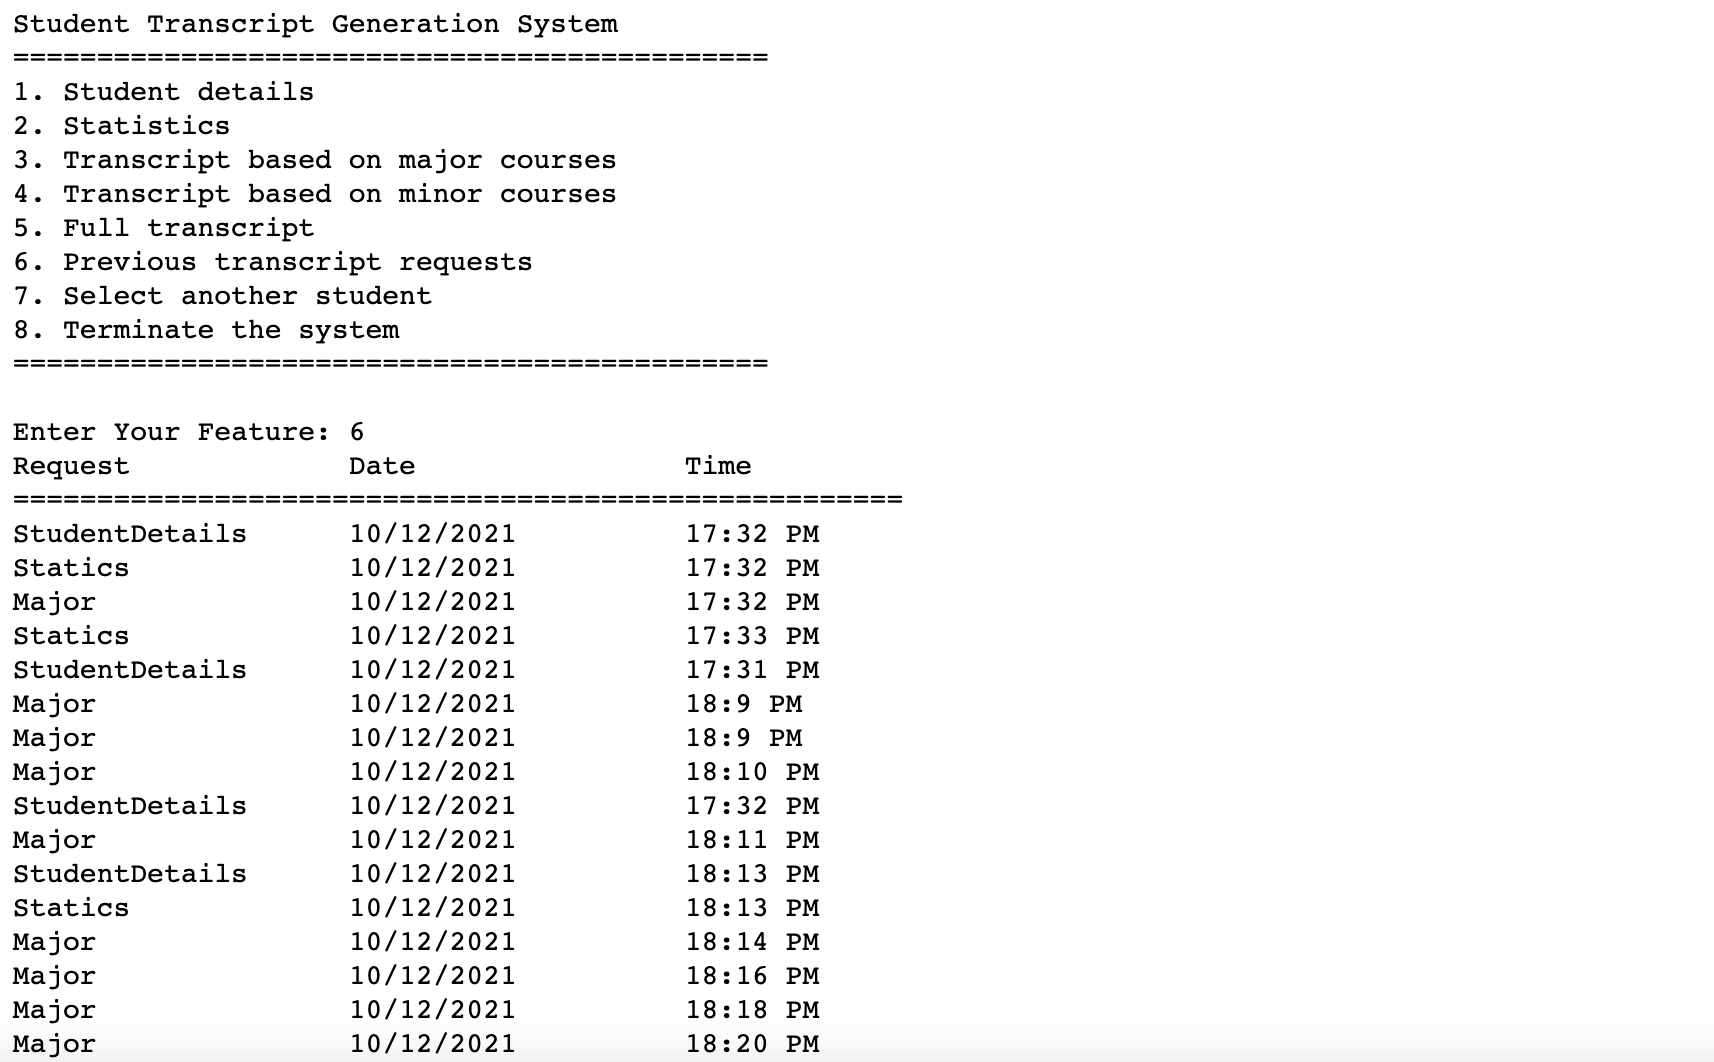


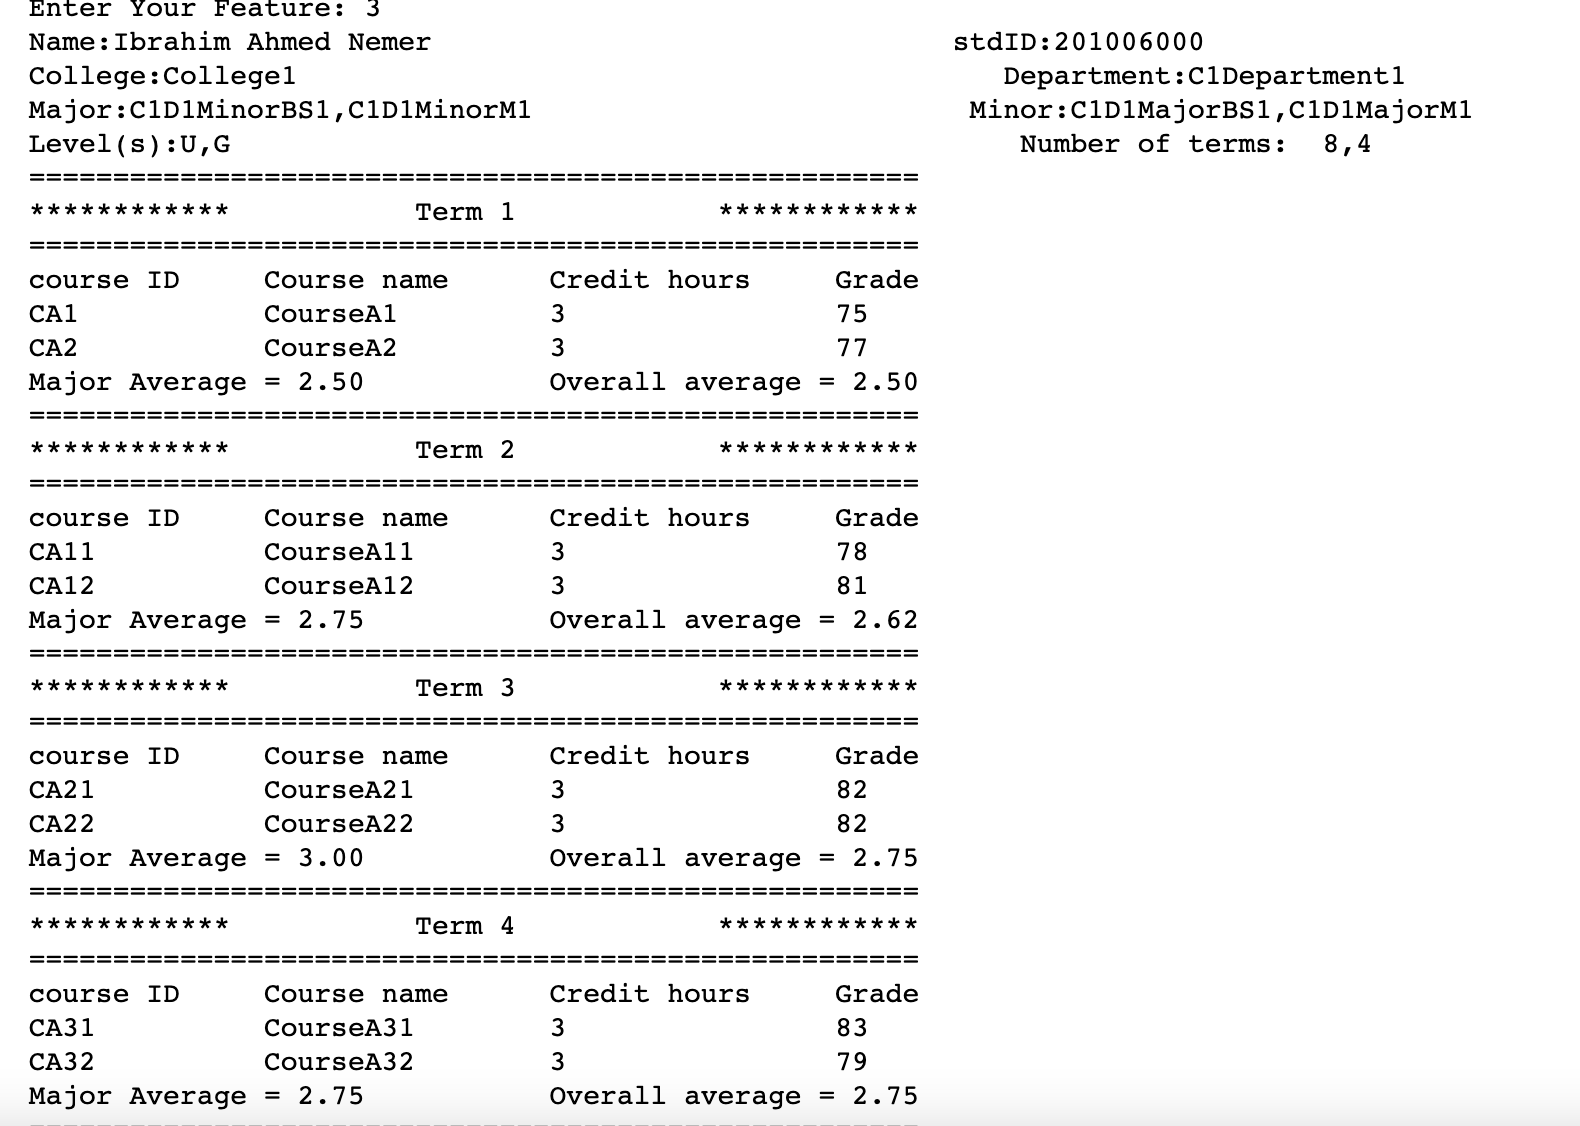

# References
Report here the relevant references (journals, books, websites):
1. acadamicanswers.com , https://academicanswers.waldenu.edu/faq/73219
2. Kite.com, How to check if a file is empty in Python, https://www.kite.com/python/answers/how-to-check-if-a-file-is-empty-in-python
3. Osama Ahmed alsayed, Elzero Web School, exceptions Handling Advanced Example , https://www.youtube.com/watch?v=RjkKwZ-p7YU&list=PLDoPjvoNmBAyE_gei5d18qkfIe-Z8mocs&index=92
4. Osama Ahmed alsayed, Elzero Web School, Date And Time Introduction, https://www.youtube.com/watch?v=NH7Qd1_IGqM

In [180]:
main()

Student Transcript Generation System
1. Student details
2. Statistics
3. Transcript based on major courses
4. Transcript based on minor courses
5. Full transcript
6. Previous transcript requests
7. Select another student
8. Terminate the system

Enter Your Feature: 1
Name: Ibrahim Ahmed Nemer
stdId: 201006000
Level(s): U,G
Number of terms: 8,4,6
Colleges: College1
Departments: C1Department1
Student Transcript Generation System
1. Student details
2. Statistics
3. Transcript based on major courses
4. Transcript based on minor courses
5. Full transcript
6. Previous transcript requests
7. Select another student
8. Terminate the system

Enter Your Feature: 6
Request             Date                Time
StudentDetails      12/12/2021          12:39 PM
Statics             12/12/2021          12:39 PM
Full                12/12/2021          12:40 PM
Minor               12/12/2021          12:40 PM
StudentDetails      12/12/2021          20:28 PM
Statics             12/12/2021          20:28 PM